#### Import the required packages with their customary aliases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### OPEN and Read Files

In [3]:
covidzip_df =pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
vaccine_df =pd.read_csv('../data/vaccine_with_protocol.csv')


###### Review of the `covidzip` df

In [4]:
covidzip_df.head()


,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


###### Review of the `vaccine` df

In [5]:
vaccine_df.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


###### Rename Column Headers to be understood for the project

In [6]:
vaccine_df = vaccine_df.rename(columns={'vacc_date':'date','zipcode':'zip','count_given':'vaccine_given','dose_nbr':'dose'})
vaccine_df.head()

,date,zip,vaccine_given,dose,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [7]:
covidzip_df =covidzip_df.rename(columns={'Specimen Collection Date':'date','Zip':'zip','Cases':'cases'})
covidzip_df.head()

,date,zip,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


##### Review Covid Dataframe Information and Data types and Vaccine Dataframe Information and Data Types

In [8]:
covidzip_df.info()
print('\n***********************************************************\n')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8832 non-null   object 
 1   zip     8456 non-null   float64
 2   cases   8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB

***********************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6694 non-null   object 
 1   zip            6462 non-null   float64
 2   vaccine_given  6686 non-null   float64
 3   dose           6686 non-null   float64
 4   protocol       6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [9]:
#Only review the data types
covidzip_df.dtypes


date      object
zip      float64
cases      int64
dtype: object

In [10]:
vaccine_df.dtypes

date              object
zip              float64
vaccine_given    float64
dose             float64
protocol          object
dtype: object

##### Checking for `null` Values

In [11]:
#checking if any thing is null
covidzip_df.isnull().sum()

date       0
zip      376
cases      0
dtype: int64

In [12]:
#checking if any thing is null
vaccine_df.isnull().sum()

date               0
zip              232
vaccine_given      8
dose               8
protocol           0
dtype: int64

#### Change of Data Types
The Covid Zipcodes are changed from float64 to String in Covidzip     
The Vaccine Zipcode  are changed from float64 to String   
The dates are changed to date type

In [13]:
covidzip_df['zip'] = covidzip_df['zip'].astype('Int64').astype(str)
covidzip_df['date']= pd.to_datetime(covidzip_df['date'])
covidzip_df.dtypes

date     datetime64[ns]
zip              object
cases             int64
dtype: object

In [14]:
covidzip_df.tail()

,date,zip,cases
8827,2021-03-27,37210,1
8828,2021-03-27,37211,1
8829,2021-03-27,37212,1
8830,2021-03-27,37214,2
8831,2021-03-27,37221,2


In [15]:
vaccine_df['zip'] = vaccine_df['zip'].astype('Int64').astype(str)
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])
vaccine_df.dtypes

date             datetime64[ns]
zip                      object
vaccine_given           float64
dose                    float64
protocol                 object
dtype: object

In [16]:
vaccine_df.tail()

,date,zip,vaccine_given,dose,protocol
6689,2021-04-07,37228,9.0,1.0,two-shot
6690,2021-04-07,37228,2.0,2.0,two-shot
6691,2021-04-07,<NA>,8.0,1.0,two-shot
6692,2021-04-07,<NA>,1.0,1.0,one-shot
6693,2021-04-07,<NA>,7.0,2.0,two-shot


In [17]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           6694 non-null   datetime64[ns]
 1   zip            6694 non-null   object        
 2   vaccine_given  6686 non-null   float64       
 3   dose           6686 non-null   float64       
 4   protocol       6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB


##### Identify Zip Counts in the Dataframe

In [18]:
covidzip_df['zip'].value_counts()
# print('\n**********************************************\n')
# vaccine_df.zipcode.value_counts()


37013    382
37211    379
<NA>     376
37209    364
37217    362
37115    361
37207    361
37076    357
37214    355
37203    344
37221    342
37206    340
37072    338
37208    338
37210    336
37205    330
37138    323
37218    321
37216    318
37215    317
37212    313
37204    306
37220    214
37189    211
37080    192
37228    168
37201    153
37219    140
37027    132
37213     43
37069     13
37238      3
Name: zip, dtype: int64

##### Summarize Cases by Zipcode in separate Data_frame

In [19]:
#cases per zipcode
covid_zip_summary =covidzip_df.groupby(['zip'],as_index=False)['cases'].sum()
#Sort by total number of cases
covid_zip_summary =covid_zip_summary.sort_values('cases', ascending=False)
covid_zip_summary

,zip,cases
0,37013,13354
18,37211,10233
31,<NA>,8412
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508


##### Identify Zip Counts in the Dataframe that had Vaccinations

In [20]:
vaccine_df.zip.value_counts()

37215    247
37211    242
37205    241
37221    240
37209    240
37072    239
37207    239
37204    239
37206    238
37115    238
37203    238
37216    237
37076    237
37214    237
37212    235
37013    235
37138    234
<NA>     232
37208    232
37217    232
37210    231
37220    228
37218    227
37080    217
37189    215
37219    194
37228    184
37201    183
37027    124
37213     74
37069     60
37238      5
Name: zip, dtype: int64

##### Vaccination summarization

In [21]:
#vaccine_df.loc[(vaccine_df['dose_nbr'] == '2.0') & (vaccine_df['protocol'] == 'two-shot'), 'complete'] = 'Fully'  
#vaccine_df.loc[(vaccine_dfl['dose_nbr'] == '1.0') & (vaccine_df['protocol'] == 'two-shot'), 'complete'] = 'Half' 
#vaccine_df.loc[(vaccine_dfl['dose_nbr'] == '1.0') & (vaccine_df['protocol'] == 'one-shot'), 'complete'] = 'Fully'
#print(V_protocol.tail(50))

# create a list of conditions
conditions = [
    
    (vaccine_df['dose'] == 2.0) & (vaccine_df['protocol'] == 'two-shot'),
    (vaccine_df['dose'] == 1.0) & (vaccine_df['protocol'] == 'two-shot'),
    (vaccine_df['dose'] == 1.0) & (vaccine_df['protocol'] == 'one-shot')
    ]

# create a list of the values we want to assign for each condition
values = ['Full', 'Half', 'Full']

# create a new column and use np.select to assign values to it using our lists as arguments
vaccine_df['vaccine_status'] = np.select(conditions, values)

vaccine_df.tail()

,date,zip,vaccine_given,dose,protocol,vaccine_status
6689,2021-04-07,37228,9.0,1.0,two-shot,Half
6690,2021-04-07,37228,2.0,2.0,two-shot,Full
6691,2021-04-07,<NA>,8.0,1.0,two-shot,Half
6692,2021-04-07,<NA>,1.0,1.0,one-shot,Full
6693,2021-04-07,<NA>,7.0,2.0,two-shot,Full


In [22]:
vaccine_zip_summary =vaccine_df.groupby(['zip'],as_index=False)['vaccine_status'].count()
vaccine_zip_summary

,zip,vaccine_status
0,37013,235
1,37027,124
2,37069,60
3,37072,239
4,37076,237
5,37080,217
6,37115,238
7,37138,234
8,37189,215
9,37201,183


###### Try to breakdown the vaccine shots between partial and complete

In [23]:
vaccine_zip_status =vaccine_df.groupby(['zip','vaccine_status']).size().reset_index(name="qtys")
vaccine_zip_status

,zip,vaccine_status,qtys
0,37013,Full,124
1,37013,Half,111
2,37027,Full,51
3,37027,Half,73
4,37069,0,2
...,...,...,...
61,37228,Half,99
62,37238,Full,2
63,37238,Half,3
64,<NA>,Full,122


In [24]:
vaccine_counts =vaccine_df.groupby(['vaccine_status']).size().reset_index(name="qtys")
vaccine_counts

,vaccine_status,qtys
0,0,8
1,Full,3449
2,Half,3237


Utilize the method to some basic statistical details like percentile, mean, std etc.     of a data frame or a series of numeric values

In [25]:
covid_by_zip_df = covidzip_df.groupby('zip')

covid_by_zip_df.describe()

cases                                                     
       count       mean        std  min   25%   50%    75%    max
zip                                                              
37013  382.0  34.958115  33.469041  1.0  13.0  24.0  45.00  215.0
37027  132.0   1.750000   1.231737  1.0   1.0   1.0   2.00    7.0
37069   13.0   1.230769   0.599145  1.0   1.0   1.0   1.00    3.0
37072  338.0   8.828402   9.351692  1.0   3.0   5.5  12.00   59.0
37076  357.0  11.985994  11.779449  1.0   3.0   8.0  16.00   61.0
37080  192.0   2.989583   2.594778  1.0   1.0   2.0   4.00   14.0
37115  361.0  12.670360  11.707995  1.0   4.0   9.0  17.00   82.0
37138  323.0   7.303406   8.020600  1.0   2.0   5.0   9.00   43.0
37189  211.0   2.270142   1.736995  1.0   1.0   2.0   3.00   12.0
37201  153.0   1.954248   1.268753  1.0   1.0   2.0   2.00    7.0
37203  344.0   9.726744   9.460723  1.0   3.0   6.0  14.00   69.0
37204  306.0   5.836601   5.044663  1.0   2.0   4.0   8.00   24.0
37205  330.0   7.775758   7.977439  1.0   2.0   5.0  10.00   48.0
37206  340.0   9.152941   8.973913  1.0   3.0   6.0  13.00   51.0
37207  361.0  13.099723  12.212063  1.0   4.0   9.0  17.00   66.0
37208  338.0   7.183432   6.990164  1.0   2.0   5.0  11.00   38.0
37209  364.0  13.934066  13.013493  1.0   4.0   9.0  19.00   73.0
37210  336.0   6.250000   6.088158  1.0   2.0   4.0   8.00   38.0
37211  379.0  27.000000  25.454389  1.0   9.0  18.0  36.00  159.0
37212  313.0   5.824281   5.163772  1.0   2.0   4.0   8.00   43.0
37213   43.0   1.511628   1.334025  1.0   1.0   1.0   1.50    9.0
37214  355.0   9.881690  10.472864  1.0   3.0   6.0  13.00   66.0
37215  317.0   7.690852   6.949570  1.0   2.0   6.0  11.00   41.0
37216  318.0   6.323899   5.906644  1.0   2.0   4.0   9.00   31.0
37217  362.0  10.792818   9.774672  1.0   4.0   8.0  14.00   68.0
37218  321.0   5.560748   5.538238  1.0   2.0   4.0   7.00   47.0
37219  140.0   1.928571   1.520332  1.0   1.0   1.0   2.00   11.0
37220  214.0   3.065421   2.465808  1.0   1.0   2.0   4.00   14.0
37221  342.0  11.432749  11.967938  1.0   3.0   7.0  15.00   65.0
37228  168.0   1.845238   1.168386  1.0   1.0   1.0   2.00    6.0
37238    3.0   1.000000   0.000000  1.0   1.0   1.0   1.00    1.0
<NA>   376.0  22.372340  31.370299  1.0   5.0  12.0  25.25  272.0

##### Try Plotting Covid Graph

Text(0.5, 1.0, 'Covid Cases by zip')

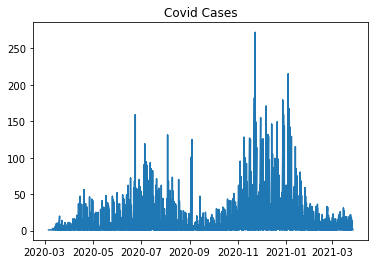

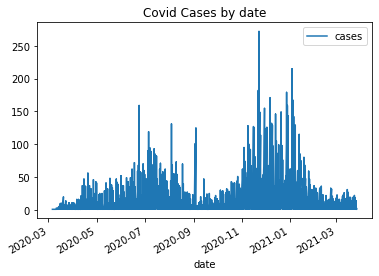

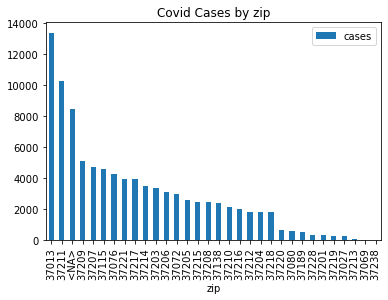

In [26]:

#plt.figure(figsize=(10, 6))
#covidzip_df = covidzip_df.sort_values('cases')
# Map a plot date vs cases

plt.plot('date', 'cases', data = covidzip_df)
# plt.xticks(rotation = 50)
plt.title('Covid Cases')
# the semi-colon supresses the output line

covidzip_df.plot.line('date','cases')
plt.title('Covid Cases by date')

covid_zip_summary.plot.bar('zip','cases')
plt.title('Covid Cases by zip')

In [27]:
covidzip_df.head()

,date,zip,cases
0,2020-03-06,37217,1
1,2020-03-10,37214,1
2,2020-03-11,37013,1
3,2020-03-11,37204,2
4,2020-03-11,37205,1


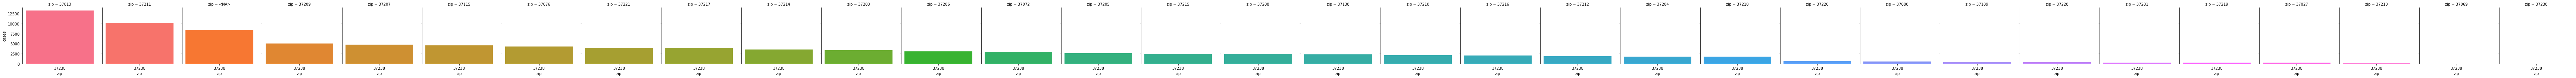

In [28]:

g=sns.FacetGrid(covid_zip_summary, col='zip',hue='zip')
g.map(plt.bar,"zip","cases")

##### Try to Plot vaccine Graphs

Text(0.5, 1.0, 'Vaccination by Zip')

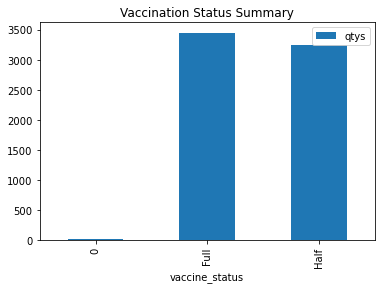

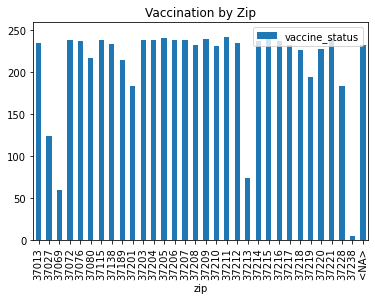

In [29]:
#Summary chart after completing data frame vaccine_counts
vaccine_counts.plot.bar('vaccine_status','qtys')
plt.title('Vaccination Status Summary')

#Summary chart of Vaccinations by Zip
vaccine_zip_summary.plot.bar('zip','vaccine_status')
plt.title('Vaccination by Zip')


##### Importing an external map file

In [30]:
house_income = gpd.read_file('../data/acs2019_5yr/acs2019_5yr.geojson')
print(house_income.crs)
house_income.head( )

NameError: name 'gpd' is not defined

#### Import income Data Excel File

In [ ]:
# Read in Excel file and then skip the first row which is a title in the excel file
#Skip rows allows that. We are then pulling in two headers since this excel has Zip and 'Value & Error'
# We can choose different excel sheets Sheet_name = 0 is actual data and Sheet_name =1 is the second percentage
income_data = pd.read_excel('../data/acs2019_5yr/acs2019_5yr.xlsx',skiprows=1, header =[0,1],sheet_name = 0)
income_data.head()

In [ ]:
# The Error column is not a good fit for our analysis. 
#Therefore, we are choosing to drop it using the regular expression filter in the list.
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
# After the above command, the header columns 'Value' do not mean much, there we drop them using column
income_data.columns = income_data.columns.droplevel(1)
income_data.head()

In [ ]:
# We then choose to transpose the dataset but not index
income_clean =income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index':'zip'})
#income_data = income_data.transpose.reset_index()
income_clean.head()

In [ ]:
income_data.reset_index(drop=False, inplace=True)
income_data.head()

#### Read and Upload file Hispanic or Latino Origin by Race

In [85]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
ethnicity_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 1)
#Drop columns with Error next to each of the columns
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
#Drop a Level of Value headers that mean nothing to the data
#ethnicity_df.columns = ethnicity_df.columns.droplevel(1)
# Remove two columns name is 'C' and 'D'
ethnicity_df.drop(ethnicity_df.index[[1,11,12,14,15,16,17,18,19,20], axis=1])
#ethnicity_df.rows = ethnicity_df.row.droplevel(9)
#Rotate the dataframe so that Zip can be column and the race data set across
#ethnicity_df= ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()
#Rename the Zip row
#ethnicity_df=ethnicity_df.rename(columns={'index':'zip','Total:':'total','Unnamed: 0_level_0':'index'})

ethnicity_df.head(50)

SyntaxError: invalid syntax (<ipython-input-85-818eb00edf21>, line 8)

Check the Length of the data set

In [54]:
len(ethnicity_df)

118

<!-- fig, ax = plt.subplots(figsize=(20,9))

sns.lineplot(data = temp_mean['temp_avg'], marker='o', sort = False, ax=ax)
ax2 = ax.twinx()
sns.barplot(data = covid_group_date, x='date', y='cases', alpha=0.5, ax=ax2);
#alpha is opaque
#ax=ax2 put this ax2 on top of the plot

that's my code for the weather graph
 -->

In [62]:
clean_covid = covid_zip_summary.dropna(axis=0)
clean_covid.drop(index=[31], axis=0, inplace=True)
clean_covid
filter_zip = clean_covid.head(10)
filter_zip

,zip,cases
0,37013,13354
18,37211,10233
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508
10,37203,3346


In [63]:
#Merge two data frame
merge_zip = filter_zip.merge(ethnicity_df, how='inner',left_on='zip',right_on='zip')
merge_zip

,zip,cases,total,Not Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, and three or more races",* Base value of zero; no percentage available
0,37013,13354,1,0.828383,0.409234,0.339803,0.000969992,0.0433944,0,0.0038187,...,0.135207,0.00455385,0.000490101,0,0,0.0251585,0.00620795,0.00364513,0.00256282,NaN
1,37211,10233,1,0.796853,0.523376,0.162346,0.00296228,0.0801659,0.00076361,0.00381805,...,0.178,0.00383122,0.000171154,0,0.000197485,0.0202357,0.000710947,0.000368639,0.000342308,NaN
2,37209,5072,1,0.922124,0.583644,0.243793,0.00217256,0.0563832,0.00175874,0.00126733,...,0.0525295,0.000853507,0.000103455,0,0,0.0227343,0.00165529,0,0.00165529,NaN
3,37207,4729,1,0.90924,0.218466,0.66402,0.0017196,0.00910378,0,0.00308517,...,0.0634483,0.00123913,0,0,0,0.0260722,0,0,0,NaN
4,37115,4574,1,0.817664,0.411744,0.35865,0.00515579,0.0133356,0.000272662,0.00733708,...,0.0910195,0.000396599,0.000694049,0,0,0.0884664,0.00175991,0.00131373,0.000446174,NaN
5,37076,4279,1,0.923607,0.654939,0.214785,0.00196708,0.0299544,0,0.00221608,...,0.0547546,0.00301287,0.000224098,0.000149399,0,0.0175294,0.000722094,0.000398396,0.000323697,NaN
6,37221,3910,1,0.962869,0.8112,0.0809177,0.000316942,0.045469,0.000463223,0.00219421,...,0.0295975,0.00114587,0,0.000316942,0,0.00521735,0.000853305,0.000316942,0.000536363,NaN
7,37217,3907,1,0.808266,0.407285,0.337126,0.00524116,0.0144629,0.000199031,0.0137,...,0.162376,0,0,0,0,0.027201,0.00215617,0.00195714,0.000199031,NaN
8,37214,3508,1,0.940088,0.71685,0.177902,0.000262055,0.0156905,0.000131027,0.0053066,...,0.0468422,0.00072065,0,0,0,0.0121855,0.000163784,0,0.000163784,NaN
9,37203,3346,1,0.959976,0.594195,0.273209,0.000795176,0.0738851,0,0.000927705,...,0.0297528,0.00304817,0,0,0,0.00682526,0.000397588,0,0.000397588,NaN


Text(0.5, 1.0, 'Covid Cases by zip')

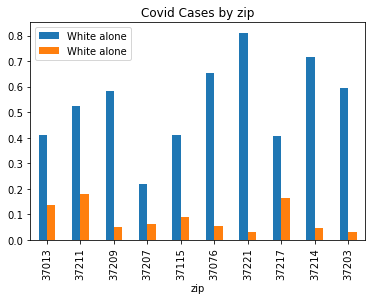

In [70]:
# Plot a Stack bar chart
# plt.bar(merge_zip.zip, merge_zip['White alone'], 
#         label='White alone')

# plt.bar(merge_zip.zip, merge_zip['Black or African American alone'],
#        label = 'Black or African American alone')


#plt.legend()
# plt.show()

merge_zip.plot.bar('zip','White alone')
plt.title('Covid Cases by zip')
